In [1]:
import pandas
import geopandas 
# import matplotlib.pyplot as plt
# from   matplotlib.pyplot import imread
# import matplotlib.patches as mpatches
# import numpy as np
# import cartopy.crs as ccrs
# import cartopy.feature as cfeat
# #import cartopy.io.shapereader as shpreader
# from   cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# import shapely.geometry as sgeom
# from   shapely.geometry import LineString
# from   shapely.geometry import MultiPoint
# from   shapely.geometry import Point, Polygon

# import urllib
import requests
from   zipfile import ZipFile
import datetime 

%matplotlib inline


In [ ]:
Advisory_Forecast_Track_Cone_of_Uncertainty_and_Watches_Warnings = 'https://www.nhc.noaa.gov/gis/forecast/archive/al122021_5day_latest.zip'
Advisory_Wind_Field_and_Forecast_Wind_Radii                      = 'https://www.nhc.noaa.gov/gis/forecast/archive/al122021_fcst_latest.zip'
Preliminary_Best_Track                                           = 'https://www.nhc.noaa.gov/gis/best_track/al122021_best_track.zip'
Graphical_Tropical_Weather_Outlook                               = 'https://www.nhc.noaa.gov/xgtwo/gtwo_shapefiles.zip'
Wind_Speed_Probabilities_Points                                  = 'https://www.nhc.noaa.gov/gis/forecast/archive/wsp_120hrhalfDeg_latest.zip'
Wind_Speed_Probabilities_Polygons                                = 'https://www.nhc.noaa.gov/gis/forecast/archive/wsp_120hr5km_latest.zip'

In [ ]:
file_name = 'gtwo_shapefiles.zip'
url = f'https://www.nhc.noaa.gov/xgtwo/{file_name}'
# download the file contents in binary format
r = requests.get(url)
# open method to open a file on your system and write the contents
with open(f'nhc_latest/{file_name}', 'wb') as code:
    code.write(r.content)
with ZipFile(f'nhc_latest/{file_name}', 'r') as gtwo_zip:
    #print(gtwo_zip.namelist())
    gtwo_areas = gtwo_zip.namelist()[2]
    gtwo_lines = gtwo_zip.namelist()[7]
    gtwo_points = gtwo_zip.namelist()[12]
gtwo_areas_gdf  = geopandas.read_file(f'zip://./nhc_latest/{file_name}!{gtwo_areas}')
gtwo_lines_gdf  = geopandas.read_file(f'zip://./nhc_latest/{file_name}!{gtwo_lines}')
gtwo_points_gdf = geopandas.read_file(f'zip://./nhc_latest/{file_name}!{gtwo_points}')

In [ ]:
storm_number = '12'
current_year = datetime.date.today().year
file_names   = [
                f'al{storm_number}{current_year}_5day_latest.zip',
                f'al{storm_number}{current_year}_fcst_latest.zip',
                f'al{storm_number}{current_year}_best_track.zip',
                f'gtwo_shapefiles.zip',
                f'wsp_120hrhalfDeg_latest.zip',
                f'wsp_120hr5km_latest.zip'
               ]
urls         = [
                f'https://www.nhc.noaa.gov/gis/forecast/archive',
                f'https://www.nhc.noaa.gov/gis/forecast/archive',
                f'https://www.nhc.noaa.gov/gis/best_track',
                f'https://www.nhc.noaa.gov/xgtwo',
                f'https://www.nhc.noaa.gov/gis/forecast/archive',
                f'https://www.nhc.noaa.gov/gis/forecast/archive'
               ]
gdf_names   =  {
                file_names[0] : ['track_line_gdf', 'cone_gdf', 'points_gdf'],
                file_names[1] : ['init_radii_gdf', 'fcst_radii_gdf'],
                file_names[2] : ['best_track_points_gdf', 'best_track_line_gdf', 'best_track_radii_gdf', 'best_track_swath_gdf'],
                file_names[3] : ['gtwo_areas_gdf', 'gtwo_lines_gdf', 'gtwo_points_gdf'],
                file_names[4] : ['wsp_34_gdf_points', 'wsp_50_gdf_points', 'wsp_64_gdf_points'],
                file_names[5] : ['wsp_34_gdf_polygons', 'wsp_50_gdf_polygons', 'wsp_64_gdf_polygons']
               }
for idx, file_name in enumerate(file_names):
    url = f'{urls[idx]}/{file_name}'
    r = requests.get(url)
    with open(f'nhc_latest/{file_name}', 'wb') as code:
        code.write(r.content) 
_  = [0, 3, 4, 5]  
__ = [2, 7, 12]  
for idx, file_name in enumerate([file_names[0],  file_names[3], 
                                file_names[4],  file_names[5]]): 
    with ZipFile(f'nhc_latest/{file_name}', 'r') as zip_file_name:
        for idx2 in range(len(gdf_names[file_names[_[idx]]])):
            gdf_names[file_names[_[idx]]][idx2]  = geopandas.read_file(
            f'zip://./nhc_latest/{file_name}!{zip_file_name.namelist()[__[idx2]]}')
_  = [0,5]                                 
with ZipFile(f'nhc_latest/{file_names[1]}', 'r') as zip_file_name:
        for idx in range(2):
            gdf_names[file_names[1]][idx]  = geopandas.read_file(
            f'zip://./nhc_latest/{file_names[1]}!{zip_file_name.namelist()[_[idx]]}')
_  = [2, 7, 13, 16]                                 
with ZipFile(f'nhc_latest/{file_names[2]}', 'r') as zip_file_name:
        for idx in range(4):
            gdf_names[file_names[2]][idx]  = geopandas.read_file(
            f'zip://./nhc_latest/{file_names[2]}!{zip_file_name.namelist()[_[idx]]}')
        
        
   
gdf_names[file_names[2]][3].head(3)

In [ ]:
for idx, file_name in enumerate(file_names):
    url = f'{urls[idx]}/{file_name}'
    
    # download the file contents in binary format
    r = requests.get(url)
    # open method to open a file on your system and write the contents
    with open(f'nhc_latest/{file_name}', 'wb') as code:
        code.write(r.content) 
    with ZipFile(f'nhc_latest/{file_name}', 'r') as zip_file_name:
        if file_name in ['al122021_5day_latest.zip', 'gtwo_shapefiles.zip', 'wsp_120hrhalfDeg_latest.zip', 
                         'wsp_120hr5km_latest.zip']:
            pass
        
        shape_file  = zip_file_name.namelist()[2]
        elif file_name == 'al122021_fcst_latest.zip':
            pass
        else:
            pass
            

In [ ]:
storm_number = '12'
current_year = datetime.date.today().year

def nhc_fnames(storm_number = '12', year = current_year):
    file_names   = [
                    f'al{storm_number}{year}_5day_latest.zip',
                    f'al{storm_number}{year}_fcst_latest.zip',
                    f'al{storm_number}{year}_best_track.zip',
                    f'gtwo_shapefiles.zip',
                    f'wsp_120hrhalfDeg_latest.zip',
                    f'wsp_120hr5km_latest.zip'
                   ]
    urls         = [
                    f'https://www.nhc.noaa.gov/gis/forecast/archive',
                    f'https://www.nhc.noaa.gov/gis/forecast/archive',
                    f'https://www.nhc.noaa.gov/gis/best_track',
                    f'https://www.nhc.noaa.gov/xgtwo',
                    f'https://www.nhc.noaa.gov/gis/forecast/archive',
                    f'https://www.nhc.noaa.gov/gis/forecast/archive'
                   ]
    gdf_names   =  {
                    file_names[0] : ['track_line_gdf', 'cone_gdf', 'points_gdf'],
                    file_names[1] : ['init_radii_gdf', 'fcst_radii_gdf'],
                    file_names[2] : ['best_track_points_gdf', 'best_track_line_gdf', 'best_track_radii_gdf', 'best_track_swath_gdf'],
                    file_names[3] : ['gtwo_areas_gdf', 'gtwo_lines_gdf', 'gtwo_points_gdf'],
                    file_names[4] : ['wsp_34_gdf_points', 'wsp_50_gdf_points', 'wsp_64_gdf_points'],
                    file_names[5] : ['wsp_34_gdf_polygons', 'wsp_50_gdf_polygons', 'wsp_64_gdf_polygons']
                   }
    return file_names, urls, gdf_names
nhc_fnames()

def nhc_gis_downloader(file_names, urls, gdf_names):

    for idx, file_name in enumerate(file_names):
        url = f'{urls[idx]}/{file_name}'
        r = requests.get(url)
        with open(f'nhc_latest/{file_name}', 'wb') as code:
            code.write(r.content) 
    _  = [0, 3, 4, 5]  
    __ = [2, 7, 12]  
    for idx, file_name in enumerate([file_names[0],  file_names[3], 
                                    file_names[4],  file_names[5]]): 
        with ZipFile(f'nhc_latest/{file_name}', 'r') as zip_file_name:
            for idx2 in range(len(gdf_names[file_names[_[idx]]])):
                gdf_names[file_names[_[idx]]][idx2]  = geopandas.read_file(
                f'zip://./nhc_latest/{file_name}!{zip_file_name.namelist()[__[idx2]]}')
    _  = [0,5]                                 
    with ZipFile(f'nhc_latest/{file_names[1]}', 'r') as zip_file_name:
        for idx in range(2):
            gdf_names[file_names[1]][idx]  = geopandas.read_file(
            f'zip://./nhc_latest/{file_names[1]}!{zip_file_name.namelist()[_[idx]]}')
    _  = [2, 7, 13, 16]                                 
    with ZipFile(f'nhc_latest/{file_names[2]}', 'r') as zip_file_name:
        for idx in range(4):
            gdf_names[file_names[2]][idx]  = geopandas.read_file(
            f'zip://./nhc_latest/{file_names[2]}!{zip_file_name.namelist()[_[idx]]}')
    return gdf_names

file_names = nhc_fnames()[0]
urls       = nhc_fnames()[1]
gdf_names  = nhc_fnames()[2]

nhc_gis_downloader(file_names, urls, gdf_names)[nhc_fnames()[0][1]][0]

In [12]:
class NhcDownloaderBot:
    def __init__(self, storm_number = 1, year = 2020):
        self.file_names   = file_names = [
                                            f'al{storm_number}{year}_5day_latest.zip',
                                            f'al{storm_number}{year}_fcst_latest.zip',
                                            f'al{storm_number}{year}_best_track.zip',
                                            f'gtwo_shapefiles.zip',
                                            f'wsp_120hrhalfDeg_latest.zip',
                                            f'wsp_120hr5km_latest.zip'
                                         ]
        self.urls         = urls       = [
                                            f'https://www.nhc.noaa.gov/gis/forecast/archive',
                                            f'https://www.nhc.noaa.gov/gis/forecast/archive',
                                            f'https://www.nhc.noaa.gov/gis/best_track',
                                            f'https://www.nhc.noaa.gov/xgtwo',
                                            f'https://www.nhc.noaa.gov/gis/forecast/archive',
                                            f'https://www.nhc.noaa.gov/gis/forecast/archive'
                                         ]
        self.gdf_names   =  gdf_names  = {
                                            file_names[0] : ['track_line_gdf', 'cone_gdf', 'points_gdf'],
                                            file_names[1] : ['init_radii_gdf', 'fcst_radii_gdf'],
                                            file_names[2] : ['best_track_points_gdf', 'best_track_line_gdf', 'best_track_radii_gdf', 'best_track_swath_gdf'],
                                            file_names[3] : ['gtwo_areas_gdf', 'gtwo_lines_gdf', 'gtwo_points_gdf'],
                                            file_names[4] : ['wsp_34_gdf_points', 'wsp_50_gdf_points', 'wsp_64_gdf_points'],
                                            file_names[5] : ['wsp_34_gdf_polygons', 'wsp_50_gdf_polygons', 'wsp_64_gdf_polygons']
                                          }
    def nhc_gis_downloader(self, file_names, urls, gdf_names):

        for idx, file_name in enumerate(file_names):
            url = f'{urls[idx]}/{file_name}'
            r = requests.get(url)
            with open(f'nhc_latest/{file_name}', 'wb') as code:
                code.write(r.content) 
        _  = [0, 3, 4, 5]  
        __ = [2, 7, 12]  
        for idx, file_name in enumerate([file_names[0],  file_names[3], 
                                        file_names[4],  file_names[5]]): 
            with ZipFile(f'nhc_latest/{file_name}', 'r') as zip_file_name:
                for idx2 in range(len(gdf_names[file_names[_[idx]]])):
                    gdf_names[file_names[_[idx]]][idx2]  = geopandas.read_file(
                    f'zip://./nhc_latest/{file_name}!{zip_file_name.namelist()[__[idx2]]}')
        _  = [0,5]                                 
        with ZipFile(f'nhc_latest/{file_names[1]}', 'r') as zip_file_name:
                for idx in range(2):
                    gdf_names[file_names[1]][idx]  = geopandas.read_file(
                    f'zip://./nhc_latest/{file_names[1]}!{zip_file_name.namelist()[_[idx]]}')
        _  = [2, 7, 13, 16]                                 
        with ZipFile(f'nhc_latest/{file_names[2]}', 'r') as zip_file_name:
            for idx in range(4):
                gdf_names[file_names[2]][idx]  = geopandas.read_file(
                f'zip://./nhc_latest/{file_names[2]}!{zip_file_name.namelist()[_[idx]]}')
        return gdf_names
         
    @classmethod
    def gdf_file(cls, storm_number, year):
        cls._                     = NhcDownloaderBot(storm_number, year)
        cls.track_line_gdf        = cls._.nhc_gis_downloader(cls._.file_names, cls._.urls, cls._.gdf_names)[cls._.file_names[0]][0]
#         cls.cone_gdf              = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[0]][1]
#         cls.points_gdf            = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[0]][2]
#         cls.init_radii_gdf        = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[1]][0]
#         cls.fcst_radii_gdf        = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[1]][1]
#         cls.best_track_points_gdf = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[2]][0]
#         cls.best_track_line_gdf   = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[2]][1]
#         cls.best_track_radii_gdf  = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[2]][2]
#         cls.best_track_swath_gdf  = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[2]][3]
#         cls.gtwo_areas_gdf        = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[3]][0]
#         cls.gtwo_lines_gdf        = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[3]][1]
#         cls.gtwo_points_gdf       = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[3]][2]
#         cls.wsp_34_gdf_points     = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[4]][0]
#         cls.wsp_50_gdf_points     = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[4]][1]
#         cls.wsp_64_gdf_points     = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[4]][2]
#         cls.wsp_34_gdf_polygons   = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[5]][0]
#         cls.wsp_50_gdf_polygons   = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[5]][1]
#         cls.wsp_64_gdf_polygons   = _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[5]][2]
        


In [13]:
NhcDownloaderBot.gdf_file(13, 2021)
print('Done')

Done


In [15]:
NhcDownloaderBot.track_line_gdf

,STORMNAME,STORMTYPE,ADVDATE,ADVISNUM,STORMNUM,FCSTPRD,BASIN,geometry
0,Mindy,PTC,1100 PM EDT Thu Sep 09 2021,6,13.0,120.0,AL,"LINESTRING (-75.00000 32.50000, -71.60000 33.2..."


In [ ]:
ct = []
for tc in tc_list:
    df = NhcDownloaderBot.gdf_file(tc, 2021)
    ct.append(df.init_radii_gdf)
    if tc == tc_list[-1]:
        print(f'--------------------done-----------------------')
    

In [ ]:
def gdf_file(storm_number, year): 
    _ = NhcDownloaderBot(storm_number, year)
    return _.nhc_gis_downloader(_.file_names, _.urls, _.gdf_names)[_.file_names[0]][0]
gdf_file(12, 2021)

In [ ]:
class Gdf_file:
    def __init__(self, storm_number, year):

In [1]:
import pandas
import geopandas 
import matplotlib.pyplot as plt
from   matplotlib.pyplot import imread
import matplotlib.patches as mpatches
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeat
#import cartopy.io.shapereader as shpreader
from   cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import shapely.geometry as sgeom
from   shapely.geometry import LineString
from   shapely.geometry import MultiPoint
from   shapely.geometry import Point, Polygon

%matplotlib inline

In [11]:
hispaniola_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/hispaniola.shp')
división_prov_muni_y_dist_muni = geopandas.read_file('../shape_files/rd_shapes/vectores/División_Prov_Muni_y_Dist_MuniUTM.shp')
limite_gdf                     = geopandas.read_file('../shape_files/rd_shapes/vectores/limite_frontera.shp')
fay_gdf                        = geopandas.read_file('../shape_files/rd_shapes/vectores/FAY.shp')
silueta_haiti_gdf              = geopandas.read_file('../shape_files/rd_shapes/vectores/silueta_haiti.shp')
silueta_rd_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/silueta_rd.shp')
PROVINCIAS_gdf                 = geopandas.read_file('../shape_files/rd_shapes/vectores/PROVINCIAS.shp')
RIOS_gdf                       = geopandas.read_file('../shape_files/rd_shapes/vectores/RIOS.shp')



hispaniola_gdf                 = hispaniola_gdf.to_crs("EPSG:4326")
división_prov_muni_y_dist_muni = división_prov_muni_y_dist_muni.to_crs("EPSG:4326")
limite_gdf                     = limite_gdf.to_crs("EPSG:4326") 
fay_gdf                        = fay_gdf.to_crs("EPSG:4326") 
silueta_haiti_gdf              = silueta_haiti_gdf.to_crs("EPSG:4326") 
silueta_rd_gdf                 = silueta_rd_gdf.to_crs("EPSG:4326") 
PROVINCIAS_gdf                 = PROVINCIAS_gdf.to_crs("EPSG:4326")
RIOS_gdf                       = RIOS_gdf.to_crs("EPSG:4326")


In [12]:
DIR      =  '../shape_files/rd_shapes/vectores'
Features = ['/ne_10m_admin_1_states_provinces.shp',
            '/ne_10m_land.shp', 
            '/ne_10m_ocean.shp',
            '/ne_10m_coastline.shp',
            '/ne_10m_admin_0_countries.shp']
states_provinces_gdf = geopandas.read_file(f'{DIR}/{Features[0]}')
land_gdf             = geopandas.read_file(f'{DIR}/{Features[1]}')
ocean_gdf            = geopandas.read_file(f'{DIR}/{Features[2]}')
coastline_gdf        = geopandas.read_file(f'{DIR}/{Features[3]}')
countries_gdf        = geopandas.read_file(f'{DIR}/{Features[4]}')

In [ ]:
map_crs = ccrs.PlateCarree()
data_crs= ccrs.PlateCarree()

Text(0.045, -0.1, 'www.onamet.gob.do')

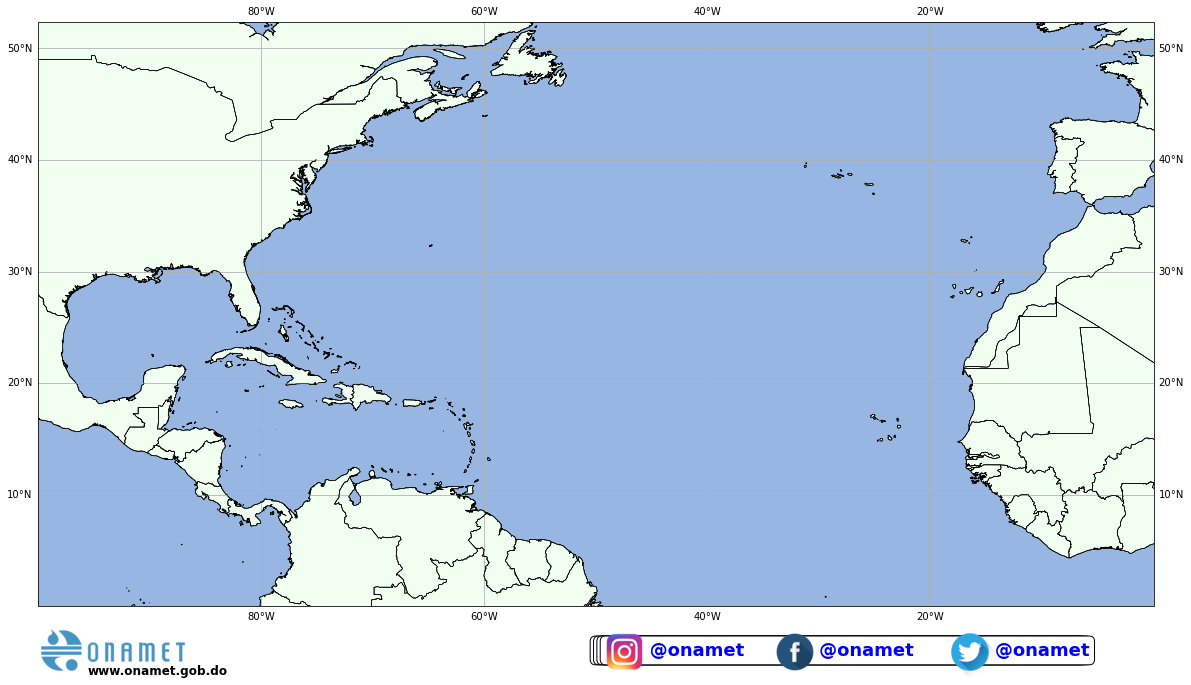

In [124]:
fig = plt.figure(figsize=(20, 20))
#fig.set_transform(t = 'transAxes')
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-100, 0, 0, 40])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

grid_lines = ax.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER

ax.add_geometries(states_provinces_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(land_gdf['geometry'], crs=data_crs, facecolor='none',
                  edgecolor='black', linewidth=1, alpha=0.7)
ax.add_geometries(coastline_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5)
ax.add_geometries(countries_gdf['geometry'], crs=data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, zorder = 10)
ax.add_geometries(countries_gdf['geometry'], crs=data_crs, facecolor='honeydew',
                 edgecolor='black', linewidth=0.5)

logo = imread('../onamet-150X43.png')
#tr = fig.set_transform(t='transAxes')
fig.figimage(logo, 40, 13, zorder=100)
x = 605
y = 13
logo = imread('../iglogo40x40.png')
fig.figimage(logo, x, y, zorder=100)
logo = imread('../fblogo40x40.png')
fig.figimage(logo, x+170, y, zorder=100)
logo = imread('../ttlogo50x50.png')
fig.figimage(logo, x+340, y-5, zorder=100)

props = dict(boxstyle='round', facecolor='white', alpha=1)
xtxt = [0.500, 0.503, 0.506, 0.509]
ytxt = -0.06
text = '       @onamet            @onamet             @onamet'
for x in xtxt:
    ax.text(x, ytxt, text, transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props, 
        weight = 'bold', color = 'blue')
xtxt = 0.045
ytxt = -0.1
text = 'www.onamet.gob.do'
ax.text(xtxt, ytxt, text, transform=ax.transAxes, fontsize=12, verticalalignment='top',
        weight = 'bold', color = 'black')

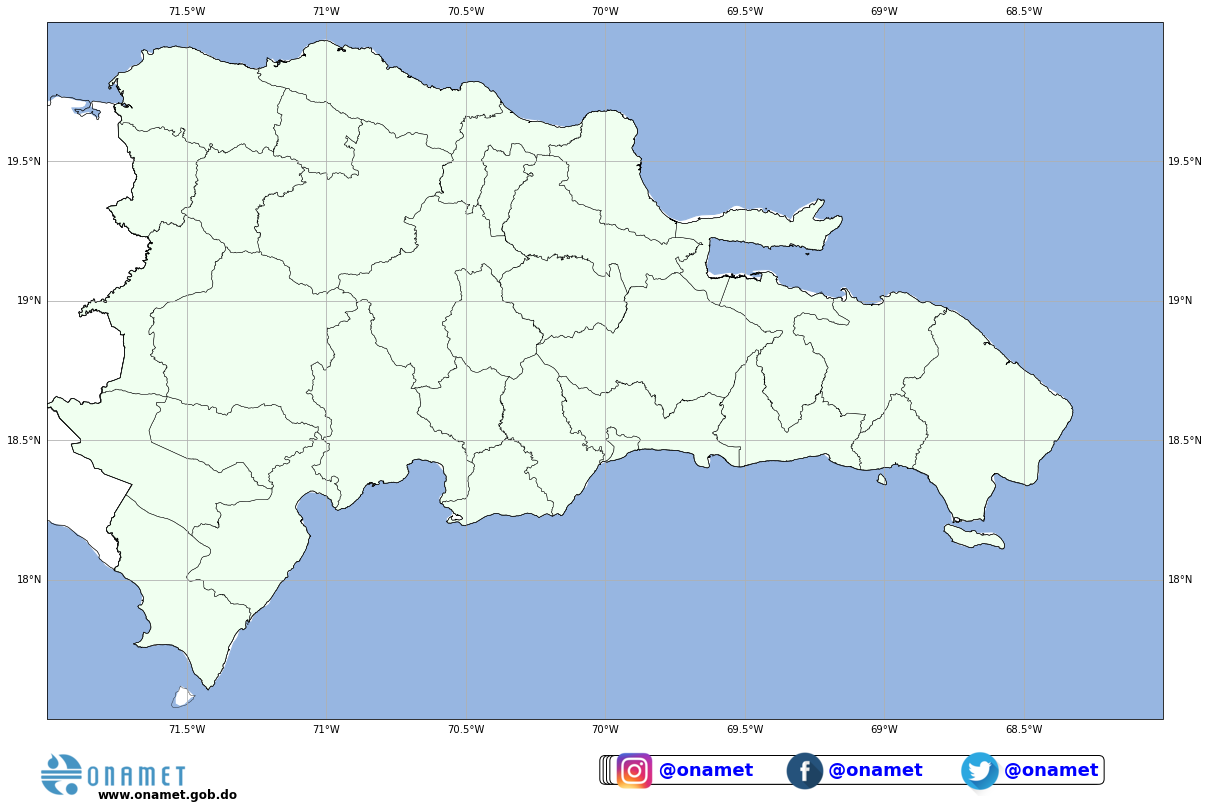

In [148]:
fig = plt.figure(figsize=(20, 20))
#fig.set_transform(t = 'transAxes')
ax  = plt.subplot(1, 1, 1, projection = map_crs)

ax.set_extent([-72, -68, 17.5, 20])
ax.add_feature(cfeat.OCEAN.with_scale('10m'))

grid_lines = ax.gridlines(draw_labels=True, auto_inline=False)

# grid_lines.xformatter = LONGITUDE_FORMATTER
# grid_lines.yformatter = LATITUDE_FORMATTER

ax.add_geometries(hispaniola_gdf['geometry'], crs=data_crs, facecolor='none',
            edgecolor='black', linewidth=0.5, alpha=0.7)
ax.add_geometries(limite_gdf['geometry'], crs=data_crs, facecolor='none',
            edgecolor='black', linewidth=1, alpha=0.7)
ax.add_geometries(silueta_haiti_gdf['geometry'], crs=data_crs, facecolor='none',
            edgecolor='black', linewidth=0.5)
ax.add_geometries(silueta_rd_gdf['geometry'], crs=data_crs, facecolor='none',
            edgecolor='black', linewidth=0.5, zorder = 10)
ax.add_geometries(PROVINCIAS_gdf['geometry'], crs=data_crs, facecolor='honeydew',
            edgecolor='black', linewidth=0.5)
                 

logo = imread('../onamet-150X43.png')
#tr = fig.set_transform(t='transAxes')
fig.figimage(logo, 40, 13, zorder=100)
x = 615
y = 18
logo = imread('../iglogo40x40.png')
fig.figimage(logo, x, y, zorder=100)
logo = imread('../fblogo40x40.png')
fig.figimage(logo, x+170, y, zorder=100)
logo = imread('../ttlogo50x50.png')
fig.figimage(logo, x+340, y-5, zorder=100)

props = dict(boxstyle='round', facecolor='white', alpha=1)
xtxt = [0.500, 0.503, 0.506, 0.509]
ytxt = -0.06
text = '       @onamet            @onamet             @onamet'
for x in xtxt:
    ax.text(x, ytxt, text, transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props, 
        weight = 'bold', color = 'blue')
xtxt = 0.045
ytxt = -0.1
text = 'www.onamet.gob.do'
ax.text(xtxt, ytxt, text, transform=ax.transAxes, fontsize=12, verticalalignment='top',
        weight = 'bold', color = 'black')
ax.tick_params(axis="y",direction="in", pad=-100)

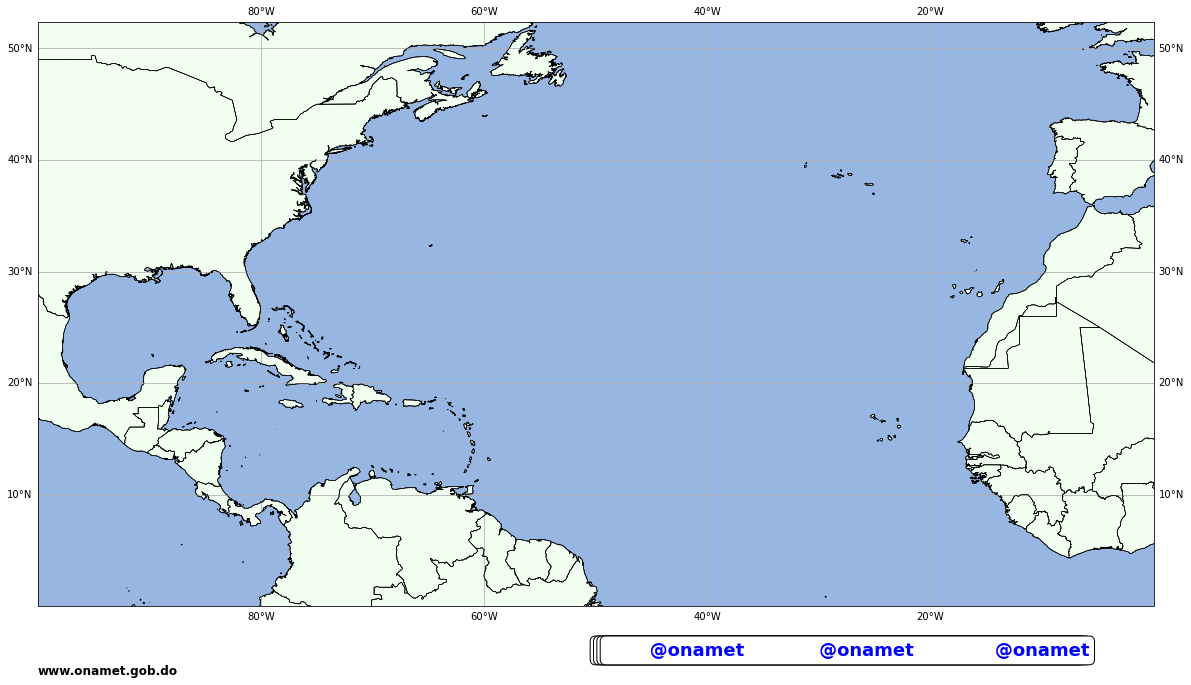

In [87]:
props = dict(boxstyle='round', facecolor='white', alpha=1)
xtxt = [0.500, 0.503, 0.506, 0.509]
ytxt = -0.06
text = '       @onamet            @onamet             @onamet'

for x in xtxt:
    ax.text(x, ytxt, text, transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props, 
        weight = 'bold', color = 'blue')
    
xtxt = 0
ytxt = -0.1
text = 'www.onamet.gob.do'
ax.text(xtxt, ytxt, text, transform=ax.transAxes, fontsize=12, verticalalignment='top',
        weight = 'bold', color = 'black')




# from matplotlib.patches import Rectangle
# x, y = 0, 0

# ax.add_patch(Rectangle((x, y), 3, 3,
#                       alpha=1, facecolor='blue'))
fig

In [21]:
class DRMapTemplate:
    def __init__(self, extent     = [-72, -68, 17.5, 20]):
        self.extent               = extent
        self.path                 = path              = '../shape_files/rd_shapes/vectores'
        self.hispaniola_gdf       = hispaniola_gdf    = geopandas.read_file(f'{ self.path }/hispaniola.shp').to_crs("EPSG:4326")
        self.municipios           = municipios        = geopandas.read_file(f'{ self.path }/División_Prov_Muni_y_Dist_MuniUTM.shp').to_crs("EPSG:4326")
        self.limite_gdf           = limite_gdf        = geopandas.read_file(f'{ self.path }/limite_frontera.shp').to_crs("EPSG:4326")
        self.silueta_haiti_gdf    = silueta_haiti_gdf = geopandas.read_file(f'{ self.path }/silueta_haiti.shp').to_crs("EPSG:4326")
        self.silueta_rd_gdf       = silueta_rd_gdf    = geopandas.read_file(f'{ self.path }/silueta_rd.shp').to_crs("EPSG:4326")
        self.provincias_gdf       = provincias_gdf    = geopandas.read_file(f'{ self.path }/PROVINCIAS.shp').to_crs("EPSG:4326")
        self.rios_gdf             = rios_gdf          = geopandas.read_file(f'{ self.path }/RIOS.shp').to_crs("EPSG:4326")
        self.cuencas_hidro_gdf    = cuencas_hidro_gdf = geopandas.read_file(f'{ self.path }/Cuencas_Hidrograficas_RD.shp').to_crs("EPSG:4326")
        self.cuencas_presas_gdf   = cuencas_presas_gdf= geopandas.read_file(f'{ self.path }/Presas-CuencasAporte.shp').to_crs("EPSG:4326")
        self.states_provinces_gdf = geopandas.read_file(f'{self.path}/ne_10m_admin_1_states_provinces.shp')
        self.land_gdf             = geopandas.read_file(f'{self.path}/ne_10m_land.shp')
        self.ocean_gdf            = geopandas.read_file(f'{self.path}/ne_10m_ocean.shp')
        self.coastline_gdf        = geopandas.read_file(f'{self.path}/ne_10m_coastline.shp')
        self.countries_gdf        = geopandas.read_file(f'{self.path}/ne_10m_admin_0_countries.shp')
        
        self.map_crs = ccrs.PlateCarree()
        self.data_crs= ccrs.PlateCarree()
        
    def base_map(self):
        
        fig = plt.figure(figsize=(20, 20))
        ax  = plt.subplot(1, 1, 1, projection = self.map_crs)

        ax.set_extent(self.extent)
        ax.add_feature(cfeat.OCEAN.with_scale('10m'))

        grid_lines = ax.gridlines(draw_labels=True)
        grid_lines.xformatter = LONGITUDE_FORMATTER
        grid_lines.yformatter = LATITUDE_FORMATTER

        ax.add_geometries(self.hispaniola_gdf['geometry'], crs=self.data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, alpha=0.7)
        ax.add_geometries(self.limite_gdf['geometry'], crs=self.data_crs, facecolor='none',
                  edgecolor='black', linewidth=1, alpha=0.7)
        ax.add_geometries(self.silueta_haiti_gdf['geometry'], crs=self.data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5)
        ax.add_geometries(self.silueta_rd_gdf['geometry'], crs=self.data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, zorder = 10)
        ax.add_geometries(self.provincias_gdf['geometry'], crs=self.data_crs, facecolor='honeydew',
                 edgecolor='black', linewidth=0.5)
        return ax
        
        
    def base_wide_map(self):
        fig = plt.figure(figsize=(20, 20))
        ax  = plt.subplot(1, 1, 1, projection = self.map_crs)
        
        logo = imread('../onamet-150X43.png')
        fig.figimage(logo, 50, 550, zorder=100)
        x = 600
        y = 30
        logo = imread('../iglogo40x40.png')
        fig.figimage(logo, x, y, zorder=100)
        logo = imread('../fblogo40x40.png')
        fig.figimage(logo, x+170, y, zorder=100)
        logo = imread('../ttlogo50x50.png')
        fig.figimage(logo, x+340, y-5, zorder=100)
        
        props = dict(boxstyle='round', facecolor='white', alpha=1)
        xtxt = [0.500, 0.503, 0.506, 0.509]
        ytxt = 0.065
        text = '       @onamet            @onamet             @onamet'
        for x in xtxt:
            ax.text(x, ytxt, text, transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props, 
                weight = 'bold', color = 'blue')
        xtxt = 0.05
        ytxt = 0.92
        text = 'www.onamet.gob.do'
        ax.text(xtxt, ytxt, text, transform=ax.transAxes, fontsize=12, verticalalignment='top',
                weight = 'bold', color = 'black')


        ax.set_extent([-100, 0, 0, 40])
        ax.add_feature(cfeat.OCEAN.with_scale('10m'))

        grid_lines = ax.gridlines(draw_labels=True)
        grid_lines.xformatter = LONGITUDE_FORMATTER
        grid_lines.yformatter = LATITUDE_FORMATTER

#         ax.add_geometries(self.states_provinces_gdf['geometry'], crs=data_crs, facecolor='none',
#                  edgecolor='black', linewidth=0.5, alpha=0.7)
        ax.add_geometries(self.land_gdf['geometry'], crs=self.data_crs, facecolor='none',
                  edgecolor='black', linewidth=1, alpha=0.7)
        ax.add_geometries(self.coastline_gdf['geometry'], crs=self.data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5)
        ax.add_geometries(self.countries_gdf['geometry'], crs=self.data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5, zorder = 10)
        
#         ax.add_geometries(self.coastline_gdf['geometry'], crs=data_crs, facecolor='honeydew',
        return ax
        
        
        

In [7]:
class MapTemplate:
    def __init__(self, extent     = [-72, -68, 17.5, 20]):
        self.extent               = extent
        self.path                 = path              = '../shape_files/rd_shapes/vectores'
        #self.hispaniola_gdf       = hispaniola_gdf    = geopandas.read_file(f'{ self.path }/hispaniola.shp').to_crs("EPSG:4326")
        #self.municipios           = municipios        = geopandas.read_file(f'{ self.path }/División_Prov_Muni_y_Dist_MuniUTM.shp').to_crs("EPSG:4326")
        #self.limite_gdf           = limite_gdf        = geopandas.read_file(f'{ self.path }/limite_frontera.shp').to_crs("EPSG:4326")
        self.silueta_haiti_gdf    = silueta_haiti_gdf = geopandas.read_file(f'{ self.path }/silueta_haiti.shp').to_crs("EPSG:4326")
        #self.silueta_rd_gdf       = silueta_rd_gdf    = geopandas.read_file(f'{ self.path }/silueta_rd.shp').to_crs("EPSG:4326")
        self.provincias_gdf       = provincias_gdf    = geopandas.read_file(f'{ self.path }/PROVINCIAS.shp').to_crs("EPSG:4326")
        #self.rios_gdf             = rios_gdf          = geopandas.read_file(f'{ self.path }/RIOS.shp').to_crs("EPSG:4326")
        #self.cuencas_hidro_gdf    = cuencas_hidro_gdf = geopandas.read_file(f'{ self.path }/Cuencas_Hidrograficas_RD.shp').to_crs("EPSG:4326")
        #self.cuencas_presas_gdf   = cuencas_presas_gdf= geopandas.read_file(f'{ self.path }/Presas-CuencasAporte.shp').to_crs("EPSG:4326")
        #self.states_provinces_gdf = geopandas.read_file(f'{self.path}/ne_10m_admin_1_states_provinces.shp')
        self.land_gdf             = geopandas.read_file(f'{self.path}/ne_10m_land.shp')
        #self.ocean_gdf            = geopandas.read_file(f'{self.path}/ne_10m_ocean.shp')
        self.coastline_gdf        = geopandas.read_file(f'{self.path}/ne_10m_coastline.shp')
        self.countries_gdf        = geopandas.read_file(f'{self.path}/ne_10m_admin_0_countries.shp')
        
        self.map_crs = ccrs.PlateCarree()
    data_crs= ccrs.PlateCarree()
        
    def base_map(self):
        fig = plt.figure(figsize=(20, 20))
        ax  = plt.subplot(1, 1, 1, projection = self.map_crs)

        ax.add_feature(cfeat.OCEAN.with_scale('10m'))

        grid_lines = ax.gridlines(draw_labels=True)
        grid_lines.xformatter = LONGITUDE_FORMATTER
        grid_lines.yformatter = LATITUDE_FORMATTER
        
        logo = imread('../onamet-150X43.png')
        fig.figimage(logo, 50, 550, zorder=100)
        x = 600
        y = 30
        logo = imread('../iglogo40x40.png')
        fig.figimage(logo, x, y, zorder=100)
        logo = imread('../fblogo40x40.png')
        fig.figimage(logo, x+170, y, zorder=100)
        logo = imread('../ttlogo50x50.png')
        fig.figimage(logo, x+340, y-5, zorder=100)
        
        props = dict(boxstyle='round', facecolor='white', alpha=1)
        xtxt = [0.500, 0.503, 0.506, 0.509]
        ytxt = 0.065
        text = '       @onamet            @onamet             @onamet'
        for x in xtxt:
            ax.text(x, ytxt, text, transform=ax.transAxes, fontsize=18, verticalalignment='top', bbox=props, 
                weight = 'bold', color = 'blue')
        xtxt = 0.05
        ytxt = 0.92
        text = 'www.onamet.gob.do'
        ax.text(xtxt, ytxt, text, transform=ax.transAxes, fontsize=12, verticalalignment='top',
                weight = 'bold', color = 'black')
        
        
        
        return ax
        
    @classmethod    
    def zoomed_map(cls):
        _ = MapTemplate()
        ax = _.base_map()
        ax.set_extent([-72, -68, 17.5, 20])
#         ax.add_geometries(_.hispaniola_gdf['geometry'], crs=cls.data_crs, facecolor='none',
#                  edgecolor='black', linewidth=0.5, alpha=0.7)
#         ax.add_geometries(_.limite_gdf['geometry'], crs=cls.data_crs, facecolor='none',
#                   edgecolor='black', linewidth=1, alpha=0.7)
        ax.add_geometries(_.silueta_haiti_gdf['geometry'], crs=cls.data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5)
#         ax.add_geometries(_.silueta_rd_gdf['geometry'], crs=cls.data_crs, facecolor='none',
#                  edgecolor='black', linewidth=0.5, zorder = 10)
        ax.add_geometries(_.provincias_gdf['geometry'], crs=cls.data_crs, facecolor='honeydew',
                 edgecolor='black', linewidth=0.5)
        return ax
        
    @classmethod     
    def wide_map(cls):
        
        _ = MapTemplate()
        ax = _.base_map()
        ax.set_extent([-100, 0, 0, 40])

#         ax.add_geometries(self.states_provinces_gdf['geometry'], crs=data_crs, facecolor='none',
#                  edgecolor='black', linewidth=0.5, alpha=0.7)
        ax.add_geometries(_.land_gdf['geometry'], crs=_.data_crs, facecolor='none',
                  edgecolor='black', linewidth=1, alpha=0.7)
        ax.add_geometries(_.coastline_gdf['geometry'], crs=_.data_crs, facecolor='none',
                 edgecolor='black', linewidth=0.5)
        ax.add_geometries(_.countries_gdf['geometry'], crs=_.data_crs, facecolor='whitesmoke',
                 edgecolor='black', linewidth=0.5, zorder = 10)
        
#         ax.add_geometries(self.coastline_gdf['geometry'], crs=data_crs, facecolor='honeydew',
        return ax

In [8]:
d = MapTemplate()
d.extent

[-72, -68, 17.5, 20]

<GeoAxesSubplot:>

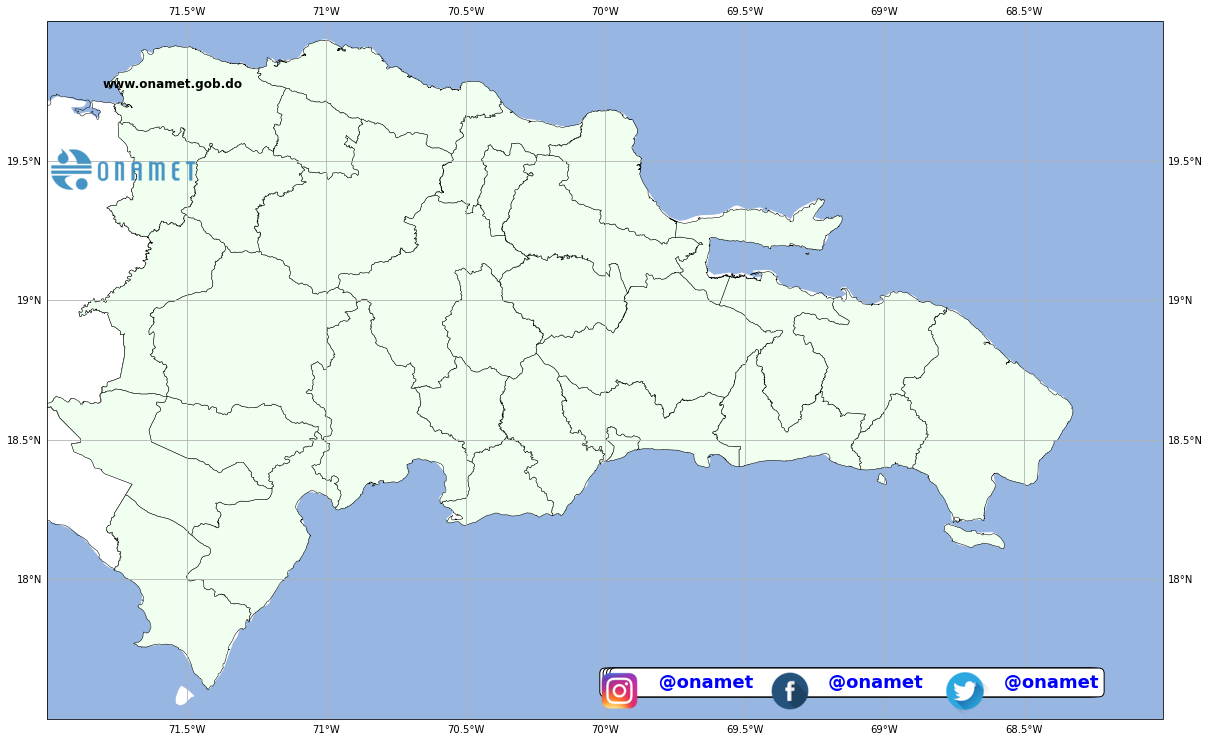

In [9]:
d.zoomed_map()

<GeoAxesSubplot:>

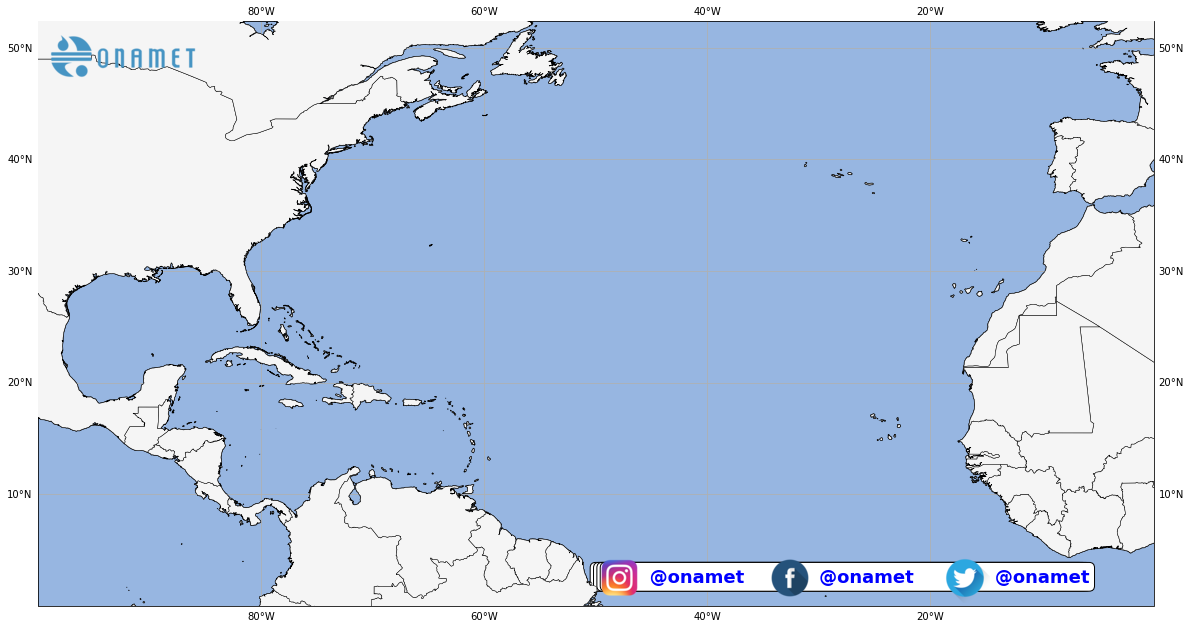

In [10]:
d.wide_map()